In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta
import mplfinance as mpf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from  sklearn.neural_network import MLPClassifier

In [35]:
df = yf.download ('ETH-USD', start='2019-09-1', end ='2021-09-1')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516
...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731


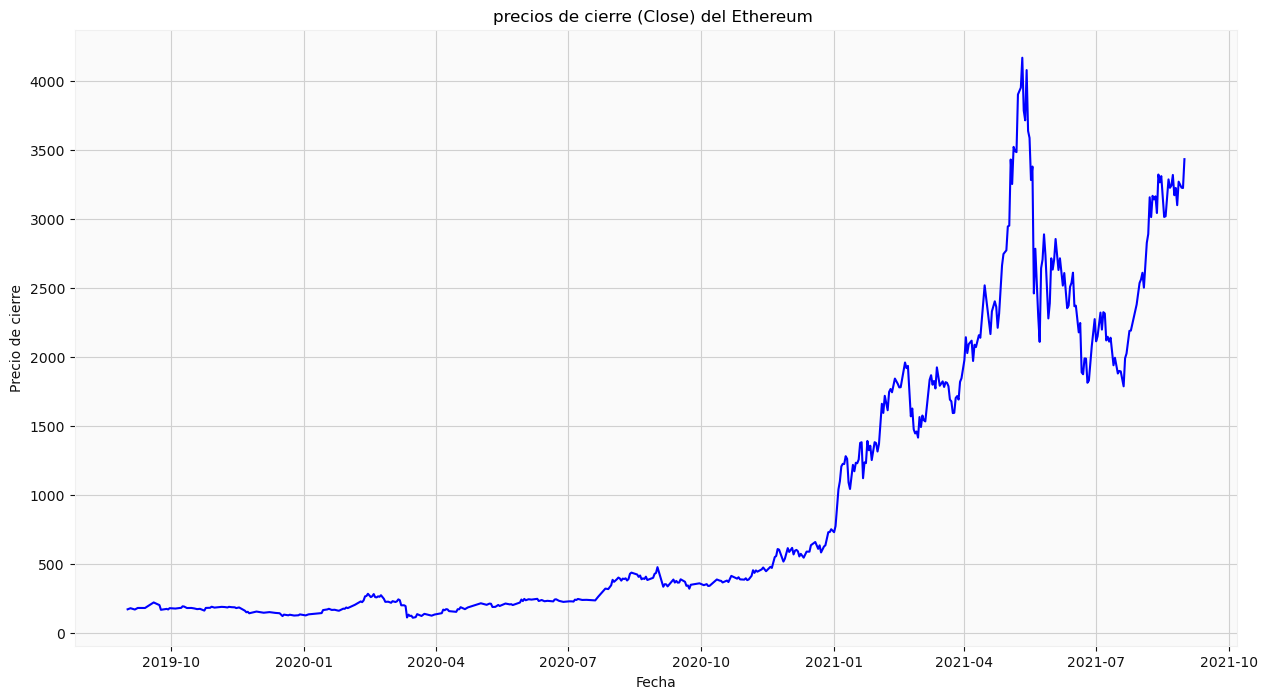

In [18]:
# Gráfico de los precios de cierre
plt.figure(figsize=(15,8))
plt.plot(df['Close'], color = 'blue')
plt.title('precios de cierre (Close) del Ethereum ')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

In [6]:
# creamos una nueva columna con los precios ajstado del dia anterior
#creamos una nueva columna con los retornos aritmeticos
df['Adj Close t-1'] = df['Adj Close'].shift(1)
df['Adj Close t-1'] = df['Adj Close'].shift(1)
df['Returns'] = (df['Adj Close'] - df['Adj Close t-1']) / df['Adj Close t-1']
df.head(10)


,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns
Date,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090
2019-09-06,174.172226,177.718704,168.341339,169.956177,169.956177,6797611878,174.217133,-0.024458
2019-09-07,169.955276,180.851608,169.444122,178.262619,178.262619,6791531342,169.956177,0.048874
2019-09-08,178.282593,182.977081,178.142502,181.355530,181.355530,6472677266,178.262619,0.017350
2019-09-09,181.362488,184.149460,177.419357,181.149460,181.149460,7232938985,181.355530,-0.001136


In [7]:
#retornos logaritmicos
df['log Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close t-1'])
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log Returns
Date,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141
...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378


In [58]:
# Calcular los retornos logarítmicos diarios
df['log Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

# Eliminar los valores NaN que se generan en la primera fila
df.dropna(inplace=True)

# Calcular el promedio de los retornos logarítmicos diarios
log_return_mean = df['log Returns'].mean()

# Número de días de negociación en un año (aproximadamente 252)
trading_days = 252

# Calcular el retorno logarítmico anualizado
log_return_annualized = log_return_mean * trading_days

print(f"Retorno logarítmico anualizado: {log_return_annualized}")

Retorno logarítmico anualizado: 1.0390491157114659


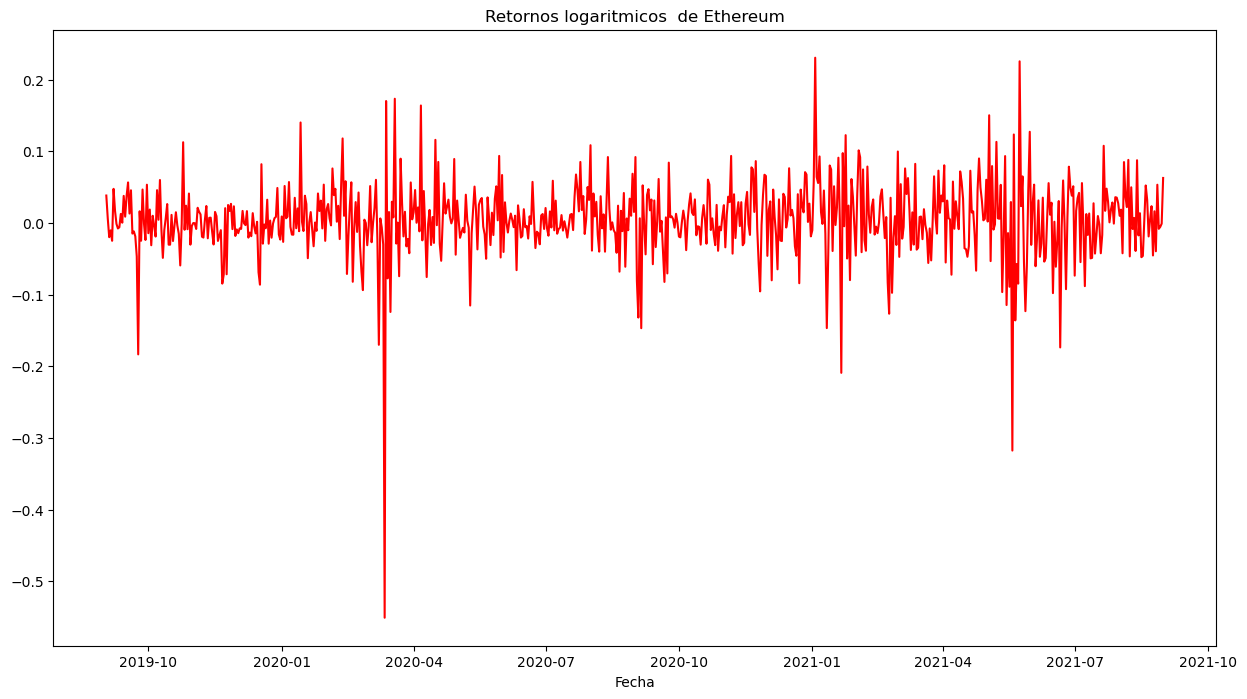

In [9]:
#graficamos los retornos logaritmicos
plt.figure(figsize=(15,8))
plt.plot(df['log Returns'], color = 'red') 
plt.title('Retornos logaritmicos  de Ethereum')
plt.xlabel('Fecha')
plt.show()

In [10]:
# Calcular la volatilidad diaria
vol_d = np.std(df['log Returns'])
vol_d 

#Volatidad diaria anualizada 
vol_a = vol_d * np.sqrt(252)
vol_a

0.8465930452865621

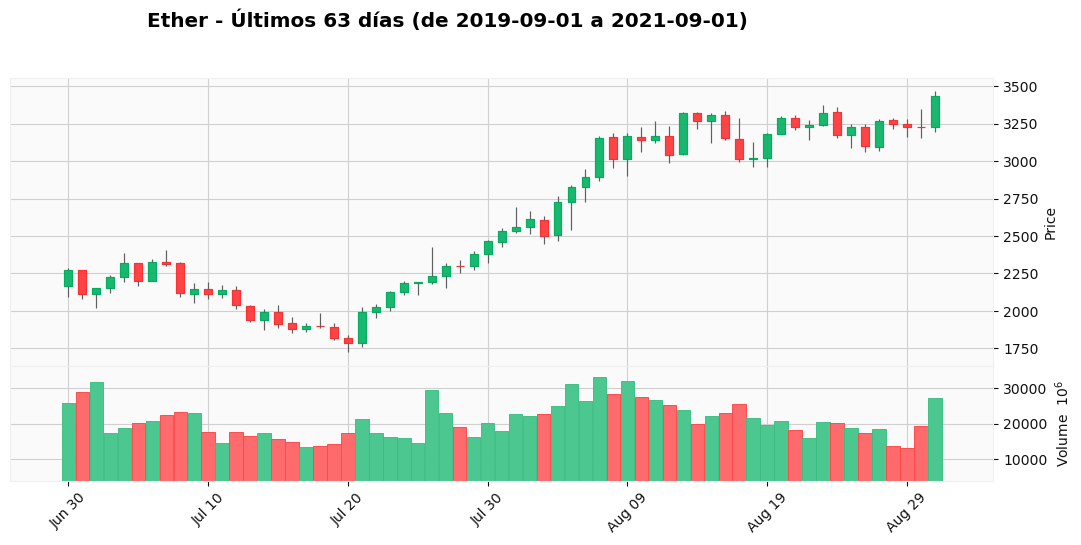

In [14]:
# Seleccionar los últimos 63 días dentro del rango de fechas
df_last_63_days = df["2019-09-01":"2021-09-01"].tail(63)

# Graficar las velas japonesas para los últimos 63 días "Candlestick"
mpf.plot(df_last_63_days, 
         type='candle', 
         volume=True, 
         figratio=(19,8), 
         style='yahoo', 
         title='Ether - Últimos 63 días (de 2019-09-01 a 2021-09-01)')

In [15]:
# Descargar datos del S&P 500
syp = yf.download('^GSPC', start='2019-09-01', end='2021-09-01')
syp

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-03,2909.010010,2914.389893,2891.850098,2906.270020,2906.270020,3427830000
2019-09-04,2924.669922,2938.840088,2921.860107,2937.780029,2937.780029,3167900000
2019-09-05,2960.600098,2985.860107,2960.600098,2976.000000,2976.000000,3902600000
2019-09-06,2980.330078,2985.030029,2972.510010,2978.709961,2978.709961,3209340000
2019-09-09,2988.429932,2989.429932,2969.389893,2978.429932,2978.429932,4031120000
...,...,...,...,...,...,...
2021-08-25,4490.450195,4501.709961,4485.660156,4496.189941,4496.189941,3444700000
2021-08-26,4493.750000,4495.899902,4468.990234,4470.000000,4470.000000,3263980000
2021-08-27,4474.100098,4513.330078,4474.100098,4509.370117,4509.370117,3331200000


In [20]:
# Extraer las columnas de 'Close' para ambas
sp500_close = syp['Close']
eth_close = df['Close']

# Función para escalar una serie de precios a un valor inicial de $100
def scale_to_100(series):
    return (series / series.iloc[0]) * 100

# Escalar ambas series a $100
sp500_scaled = scale_to_100(sp500_close)
eth_scaled = scale_to_100(eth_close)

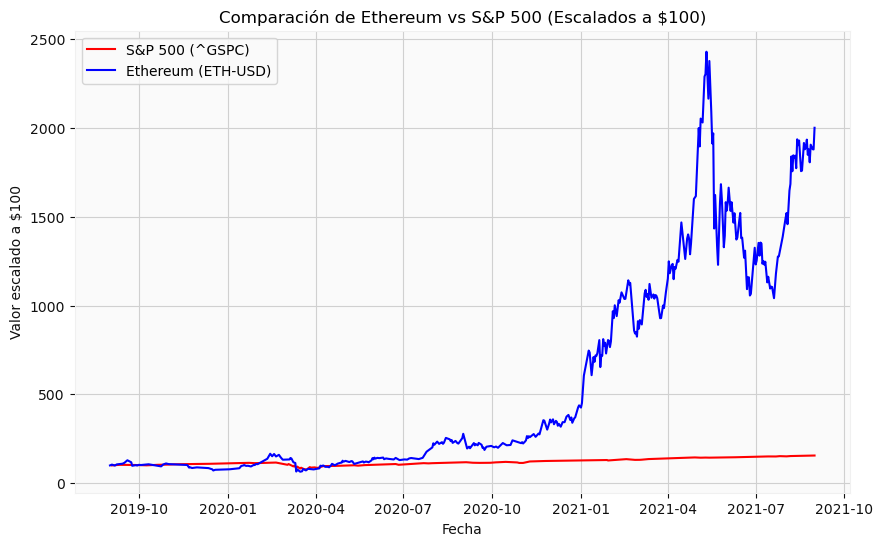

In [21]:
# Crear el gráfico
plt.figure(figsize=(10,6))

# Graficar el S&P 500 escalado
plt.plot(sp500_scaled, label='S&P 500 (^GSPC)', color='red')

# Graficar Ethereum escalado
plt.plot(eth_scaled, label='Ethereum (ETH-USD)', color='blue')

# Añadir etiquetas y título
plt.title('Comparación de Ethereum vs S&P 500 (Escalados a $100)')
plt.xlabel('Fecha')
plt.ylabel('Valor escalado a $100')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [22]:
# Media Movil Exponencial
#EMA 5 dias
df['EMA_short'] = df['Adj Close'].ewm(span=5, adjust = False).mean()

#EMA 20 dias
df['EMA_long'] = df['Adj Close'].ewm(span=20, adjust = False).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log Returns,EMA_short,EMA_long
Date,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,171.629425,171.629425
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,173.868734,172.269228
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,175.745599,172.957809
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,175.828029,173.246864
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,175.291063,173.339270
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,3211.738433,3103.066208
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,3222.626729,3116.526885
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,3224.085381,3127.048390


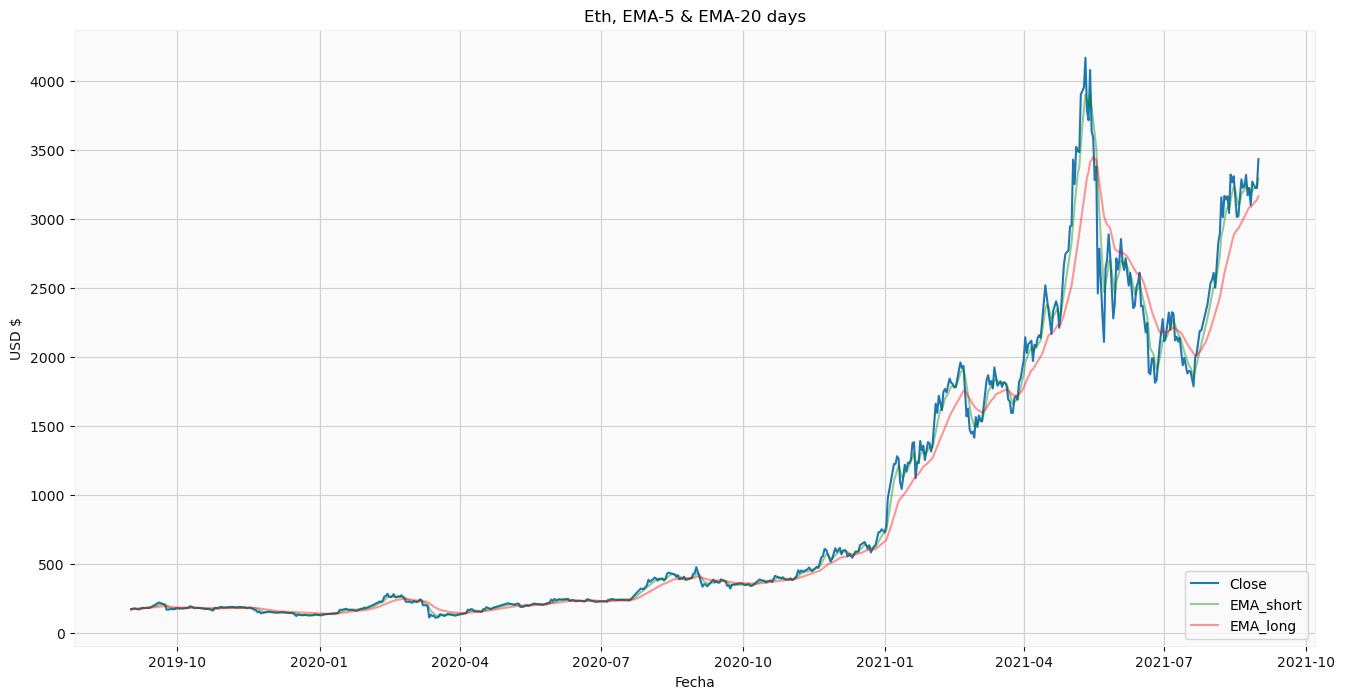

In [24]:
plt.figure(figsize=(16,8))
plt.title('Eth, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green', alpha=0.4)
plt.plot(df['EMA_long'], color='red', alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD $')
plt.legend(['Close', 'EMA_short', 'EMA_long'], loc = 'lower right')
plt.show()

In [28]:
# Numero de datos
N = len(df)
# Listas de señales 
# -1 vender
# 0 mantener 
# 1 comprar

# Inicializar la lista de señales
signals = [0]  # El primer día es mantener

# Recorrer los datos
for i in range(1, N):
    short = df['EMA_short'].iloc[i]
    long = df['EMA_long'].iloc[i]
    p_short = df['EMA_short'].iloc[i - 1]
    p_long = df['EMA_long'].iloc[i - 1]

    # Señales de compra
    if p_short < p_long and short >= long:
        signals.append(1)  # Señal de compra
    # Señales de venta
    elif p_short > p_long and short <= long:
        signals.append(-1)  # Señal de venta
    else:
        signals.append(0)  # Mantener

# Guardar las señales en el DataFrame
df['signals'] = signals
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log Returns,EMA_short,EMA_long,signals
Date,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,171.629425,171.629425,0
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,173.868734,172.269228,0
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,175.745599,172.957809,0
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,175.828029,173.246864,0
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,175.291063,173.339270,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,3211.738433,3103.066208,0
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,3222.626729,3116.526885,0
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,3224.085381,3127.048390,0


In [29]:
# Crear columnas para las posiciones de compra y venta
df['Buy'] = np.where(df['signals'] == 1, df['Close'], np.nan)
df['Sell'] = np.where(df['signals'] == -1, df['Close'], np.nan)
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log Returns,EMA_short,EMA_long,signals,Buy,Sell
Date,,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,171.629425,171.629425,0,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,173.868734,172.269228,0,NaN,NaN
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,175.745599,172.957809,0,NaN,NaN
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,175.828029,173.246864,0,NaN,NaN
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,175.291063,173.339270,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,3211.738433,3103.066208,0,NaN,NaN
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,3222.626729,3116.526885,0,NaN,NaN
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,3224.085381,3127.048390,0,NaN,NaN


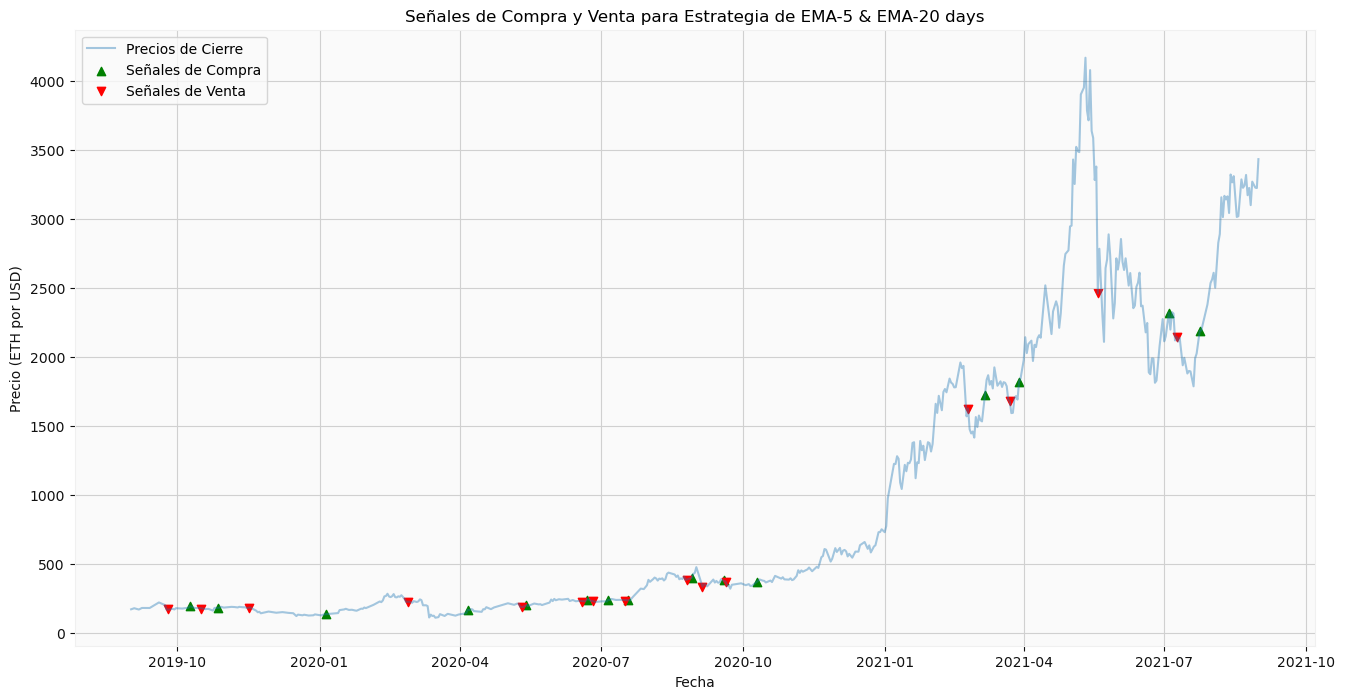

In [30]:
# Graficar
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], alpha=0.4, label='Precios de Cierre')

plt.title('Señales de Compra y Venta para Estrategia de EMA-5 & EMA-20 days')
plt.xlabel('Fecha')
plt.ylabel('Precio (ETH por USD)')

# Graficar señales de compra y venta
plt.scatter(df.index, df['Buy'], color='green', marker='^', label='Señales de Compra')
plt.scatter(df.index, df['Sell'], color='red', marker='v', label='Señales de Venta')

# Agregar leyenda
plt.legend(loc='upper left')
plt.show()

In [36]:
# Media movil exponencial
#EMA 
df['EMA_5'] = ta.trend.ema_indicator(close=df['Close'],window=5, fillna = True)/df['Close']
df['EMA_20'] =ta.trend.ema_indicator(close=df['Close'],window=20, fillna = True)/df['Close']
df['EMA_50'] = ta.trend.ema_indicator(close=df['Close'],window=50, fillna = True)/df['Close']
df['EMA_100'] = ta.trend.ema_indicator(close=df['Close'],window=100, fillna = True)/df['Close']

#RSI
df['RSI']=ta.momentum.rsi(close=df['Close'], fillna = True)
#RANGO VERDADERO MEDIO
df['ATR'] = ta.volatility.average_true_range(high =df['High'], low=df['Low'], close =df['Close'], fillna = True)

#rango de porcebtaje de willians 
df['WR'] = ta.momentum.williams_r(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)

df

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR
Date,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-49.631312
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,0.974888,0.965920,0.963810,0.963078,100.000000,0.000000,-16.938736
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,0.979088,0.963557,0.959286,0.957751,100.000000,0.000000,-22.226164
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,0.999063,0.984397,0.979246,0.977292,66.182233,0.000000,-49.584502
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,1.006164,0.994961,0.989649,0.987505,55.876558,0.000000,-63.439513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,0.999096,0.969026,0.882369,0.815646,57.596556,171.806775,-35.327498


In [37]:
cl = np.array(df['Close'])

# Crear variable target
target = np.where(cl[1:] > cl[:-1], 1, -1)

# Eliminar la última fila del DataFrame
df.drop(df.tail(1).index, inplace=True)

# Añadir columna target al DataFrame
df['target'] = target
df

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,target
Date,,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-49.631312,1
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,0.974888,0.965920,0.963810,0.963078,100.000000,0.000000,-16.938736,1
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,0.979088,0.963557,0.959286,0.957751,100.000000,0.000000,-22.226164,-1
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,0.999063,0.984397,0.979246,0.977292,66.182233,0.000000,-49.584502,-1
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,1.006164,0.994961,0.989649,0.987505,55.876558,0.000000,-63.439513,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,1.026443,0.995196,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [38]:
df.drop(df.head(29).index, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,target
Date,,,,,,,,,,,,,,
2019-09-30,170.461349,179.872208,167.036606,179.872208,179.872208,7552915148,0.981724,1.026160,1.011797,0.991137,46.844385,10.322086,-65.407042,-1
2019-10-01,180.209122,185.045532,175.812653,177.340424,177.340424,7676276225,0.997160,1.036923,1.025213,1.005183,45.265635,10.244285,-69.258170,1
2019-10-02,177.224060,180.826126,175.334274,180.710510,180.710510,6335595250,0.985709,1.015911,1.005854,0.986705,47.788096,9.904826,-64.131889,-1
2019-10-03,180.703705,180.799210,172.599869,175.199341,175.199341,6381403725,1.011144,1.043309,1.036025,1.017392,44.200688,9.783005,-71.972218,1
2019-10-04,175.238434,178.552078,173.564087,176.985001,176.985001,6248928449,1.000628,1.029661,1.024569,1.006987,45.624984,9.440504,-68.893458,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,1.026443,0.995196,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [39]:

# Crear matriz X (variables de entrada) y vector y (variable de salida)
X = np.array(df.iloc[:, 6:-1])  # Seleccionamos columnas desde la 6 hasta la penúltima
y = np.array(df['target'])

print(X.shape)
print(y.shape)

(701, 7)
(701,)


In [40]:
# Dividir en conjunto de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Verificar dimensiones después de la división
print(X_train.shape)
print(X_test.shape)

(630, 7)
(71, 7)


In [41]:
# Estandarizar los datos
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


In [42]:
#support vector machine
svc = SVC()
svc = svc.fit(X_train, y_train)

In [43]:
svc_pred = svc.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, svc_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.5915492957746479


In [44]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, svc_pred)
print(conf_matrix)



[[ 1 28]
 [ 1 41]]


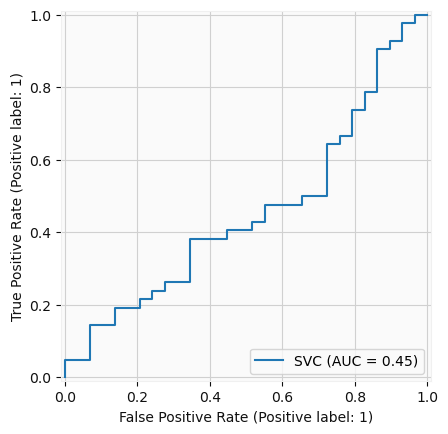

In [45]:
from sklearn.metrics import RocCurveDisplay

# Graficar curva ROC utilizando el modelo entrenado y los datos de prueba
RocCurveDisplay.from_estimator(svc, X_test, y_test)


In [46]:
#ARBOL DE DESICION
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [47]:
dtc_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, dtc_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.4084507042253521


In [48]:
conf_matrix = confusion_matrix(y_test, dtc_pred)
print(conf_matrix)

[[ 9 20]
 [22 20]]


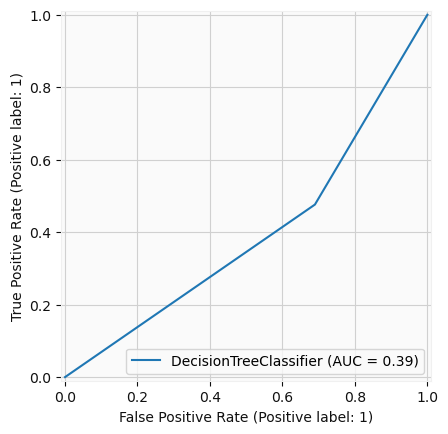

In [49]:
RocCurveDisplay.from_estimator(dtc, X_test, y_test)

In [50]:
#RANDOMFOREST
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

In [51]:
rfc_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, rfc_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.49295774647887325


In [52]:
conf_matrix = confusion_matrix(y_test, rfc_pred)
print(conf_matrix)

[[ 4 25]
 [11 31]]


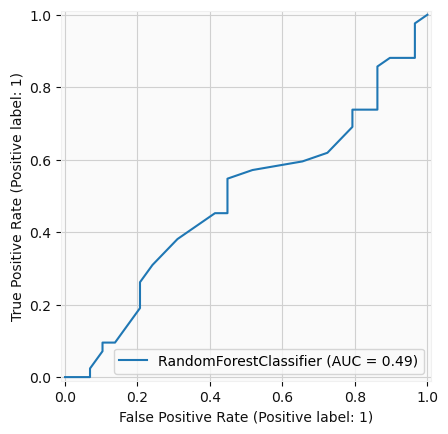

In [53]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test)

In [54]:
#redes Neuronales
nlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)
nlp =  nlp.fit(X_train, y_train)

In [55]:
nlp_pred = nlp.predict(X_test)
accuracy = accuracy_score(y_test, nlp_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.5774647887323944


In [56]:
conf_matrix = confusion_matrix(y_test, nlp_pred)
print(conf_matrix)

[[ 5 24]
 [ 6 36]]


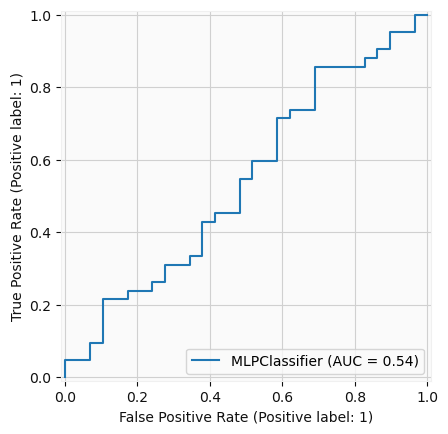

In [57]:
RocCurveDisplay.from_estimator(nlp, X_test, y_test)

In [ ]:
# aqui se realiza becktesting se copia el codigo y se adapta a esos modelos pero hay que corregirlos primero